In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def function(xi,w,b):
    y = np.dot(xi,w) + b
    return y

In [3]:
def cost(X,y,w,b):
    total_cost = 0
    m = X.shape[0]

    for i in range(m):
        y_prediction = function(X[i],w,b)
        y_diff = y_prediction - y[i]
        total_cost += y_diff ** 2

    total_cost = total_cost/(2*m)

    return total_cost

In [4]:
def derivatives(X,y,w,b):

    m,n = X.shape
    w_derivatives = np.zeros(n)
    b_derivative = 0

    for i in range(m):
        y_prediction = function(X[i],w,b)
        y_diff = y_prediction - y[i]
        for j in range(n):
            w_derivatives[j] += y_diff * X[i, j]

        b_derivative += y_diff

    w_derivatives = w_derivatives/m
    b_derivative = b_derivative/m

    return w_derivatives, b_derivative

In [39]:
def find_parameters(X,y, lr = 0.00001, max_iterations=10000):

    m,n = X.shape

    w = np.zeros(n)
    b = 0

    for i in range(max_iterations):

        w_derivatives, b_derivative = derivatives(X,y,w,b)
        w = w - (lr * w_derivatives)
        b = b - lr*b_derivative

        
        current_cost = cost(X,y,w,b)
    
        if(i%1000 == 0):
          print("Total iterations: ", i+1)
          print("Total cost: ", current_cost)

    return w,b

In [6]:
df = pd.read_csv("CarPrice_Assignment.csv")
df = df.dropna()
df.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [20]:
X = (df[["wheelbase", "carlength", "carwidth", "carheight", "horsepower", "citympg", "highwaympg"]]).to_numpy()
print(X[0:10,:])
print("X Shape: ", X.shape)

[[ 88.6 168.8  64.1  48.8 111.   21.   27. ]
 [ 88.6 168.8  64.1  48.8 111.   21.   27. ]
 [ 94.5 171.2  65.5  52.4 154.   19.   26. ]
 [ 99.8 176.6  66.2  54.3 102.   24.   30. ]
 [ 99.4 176.6  66.4  54.3 115.   18.   22. ]
 [ 99.8 177.3  66.3  53.1 110.   19.   25. ]
 [105.8 192.7  71.4  55.7 110.   19.   25. ]
 [105.8 192.7  71.4  55.7 110.   19.   25. ]
 [105.8 192.7  71.4  55.9 140.   17.   20. ]
 [ 99.5 178.2  67.9  52.  160.   16.   22. ]]
X Shape:  (205, 7)


In [21]:
y = (df[["price"]]).to_numpy()
print(y[0:10,:])
print("Y Shape: ", y.shape)

[[13495.   ]
 [16500.   ]
 [16500.   ]
 [13950.   ]
 [17450.   ]
 [15250.   ]
 [17710.   ]
 [18920.   ]
 [23875.   ]
 [17859.167]]
Y Shape:  (205, 1)


In [24]:
def normalize_data(X,y):
    X_c = np.copy(X)
    y_c = np.copy(y)
    
    n = X.shape[1]
    X_max = np.zeros(n)
    
    for i in range(n):
        X_max[i] = X_c[:,i].max()
        X_c[:,i] = X_c[:,i]/X_max[i]

    y_max = y_c.max()
    y_c = y_c/y_max

    return X_c, y_c, X_max, y_max

In [26]:
X_n, y_n, X_max, y_max = normalize_data(X,y)
print("X_normalized: ", X_n[0:10,:])
print("Max X values: ", X_max)
print("Y_normalized: ", y_n[0:10,:])
print("Max Y value: ", y_max)

X_normalized:  [[0.73283706 0.81114849 0.88658368 0.81605351 0.38541667 0.42857143
  0.5       ]
 [0.73283706 0.81114849 0.88658368 0.81605351 0.38541667 0.42857143
  0.5       ]
 [0.78163772 0.8226814  0.90594744 0.87625418 0.53472222 0.3877551
  0.48148148]
 [0.8254756  0.84863047 0.91562932 0.90802676 0.35416667 0.48979592
  0.55555556]
 [0.82216708 0.84863047 0.91839557 0.90802676 0.39930556 0.36734694
  0.40740741]
 [0.8254756  0.85199423 0.91701245 0.88795987 0.38194444 0.3877551
  0.46296296]
 [0.87510339 0.92599712 0.98755187 0.93143813 0.38194444 0.3877551
  0.46296296]
 [0.87510339 0.92599712 0.98755187 0.93143813 0.38194444 0.3877551
  0.46296296]
 [0.87510339 0.92599712 0.98755187 0.93478261 0.48611111 0.34693878
  0.37037037]
 [0.82299421 0.85631908 0.93914246 0.86956522 0.55555556 0.32653061
  0.40740741]]
Max X values:  [120.9 208.1  72.3  59.8 288.   49.   54. ]
Y_normalized:  [[0.2972467 ]
 [0.36343612]
 [0.36343612]
 [0.30726872]
 [0.38436123]
 [0.33590308]
 [0.390088

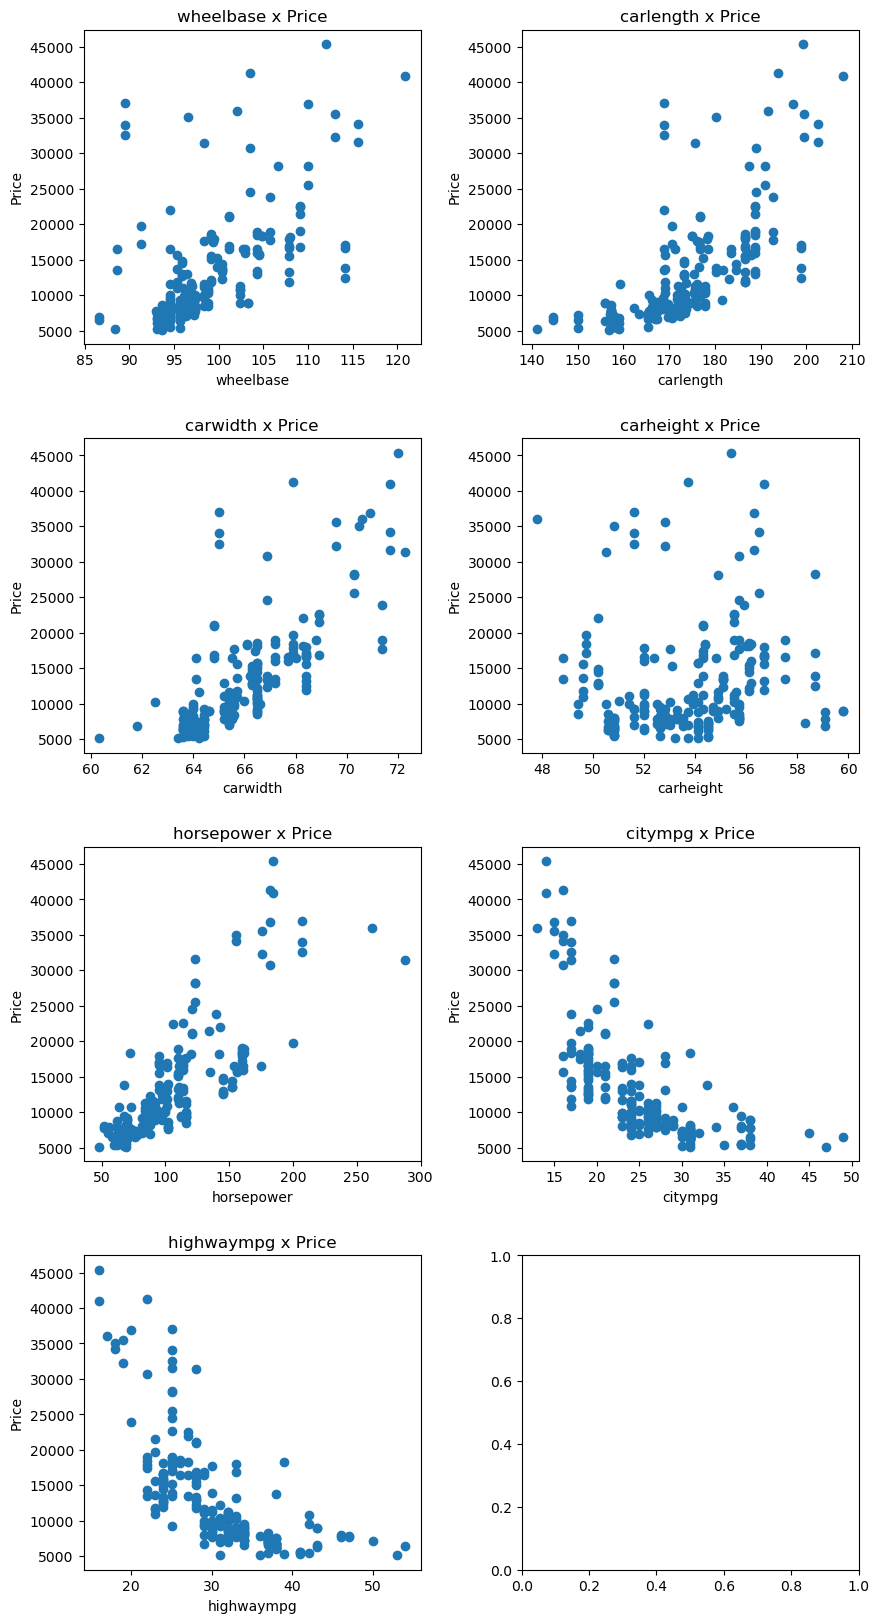

In [37]:
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

axs[0, 0].scatter(X[:,0],y)
axs[0, 0].set_title('wheelbase x Price')
axs[0, 0].set_xlabel("wheelbase")
axs[0, 0].set_ylabel("Price")

axs[0, 1].scatter(X[:,1],y)
axs[0, 1].set_title('carlength x Price')
axs[0, 1].set_xlabel("carlength")
axs[0, 1].set_ylabel("Price")

axs[1, 0].scatter(X[:,2],y)
axs[1, 0].set_title('carwidth x Price')
axs[1, 0].set_xlabel("carwidth")
axs[1, 0].set_ylabel("Price")

axs[1, 1].scatter(X[:,3],y)
axs[1, 1].set_title('carheight x Price')
axs[1, 1].set_xlabel("carheight")
axs[1, 1].set_ylabel("Price")

axs[2, 0].scatter(X[:,4],y)
axs[2, 0].set_title('horsepower x Price')
axs[2, 0].set_xlabel("horsepower")
axs[2, 0].set_ylabel("Price")

axs[2, 1].scatter(X[:,5],y)
axs[2, 1].set_title('citympg x Price')
axs[2, 1].set_xlabel("citympg")
axs[2, 1].set_ylabel("Price")

axs[3, 0].scatter(X[:,6],y)
axs[3, 0].set_title('highwaympg x Price')
axs[3, 0].set_xlabel("highwaympg")
axs[3, 0].set_ylabel("Price")

plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)


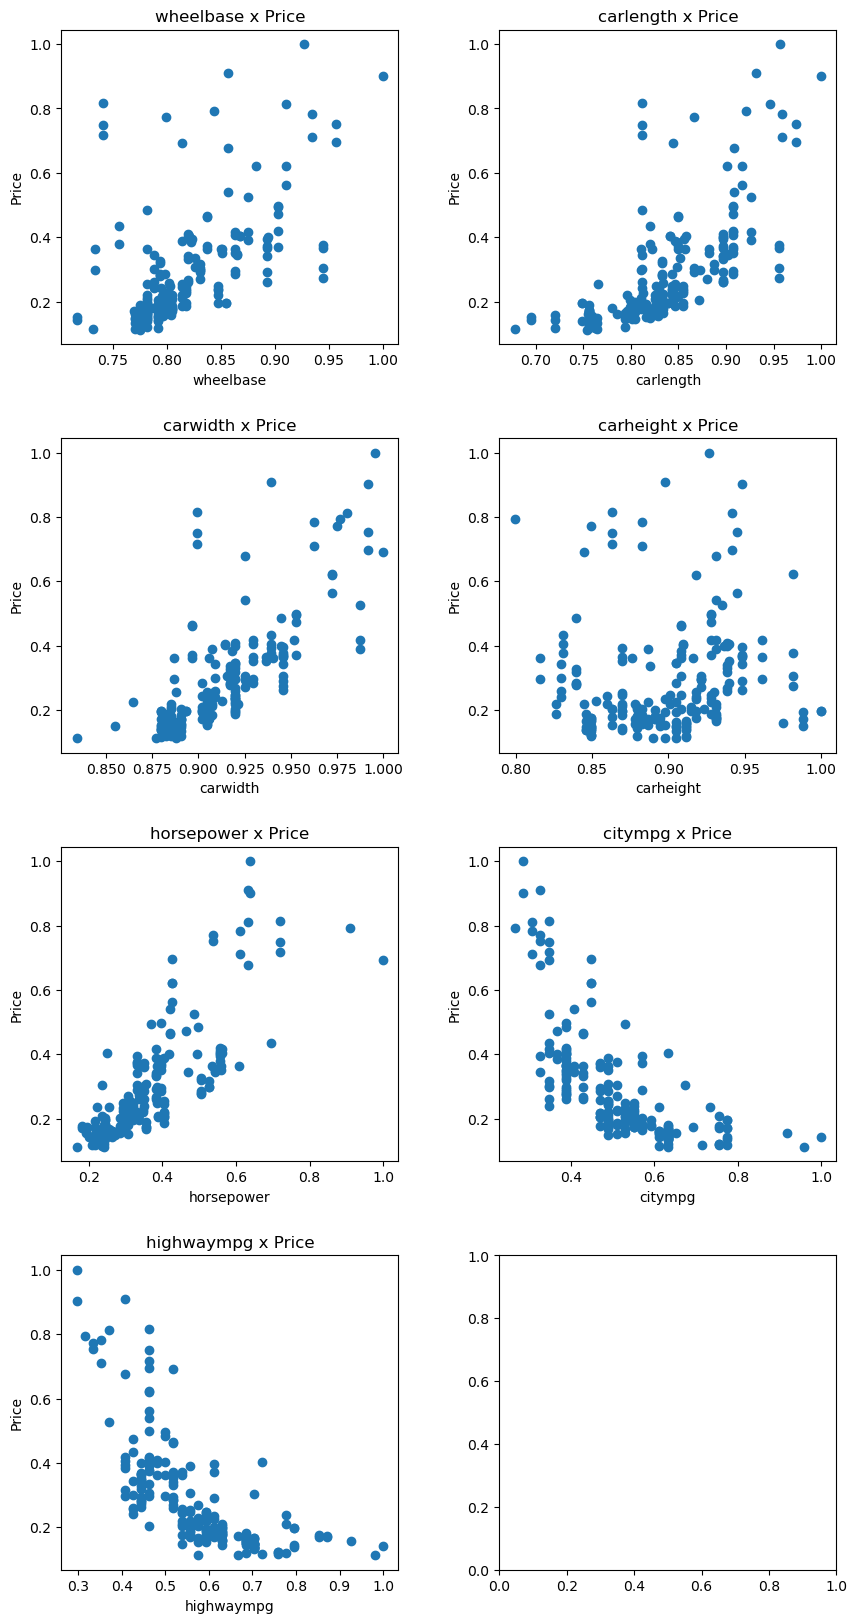

In [38]:
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

axs[0, 0].scatter(X_n[:,0],y_n)
axs[0, 0].set_title('wheelbase x Price')
axs[0, 0].set_xlabel("wheelbase")
axs[0, 0].set_ylabel("Price")

axs[0, 1].scatter(X_n[:,1],y_n)
axs[0, 1].set_title('carlength x Price')
axs[0, 1].set_xlabel("carlength")
axs[0, 1].set_ylabel("Price")

axs[1, 0].scatter(X_n[:,2],y_n)
axs[1, 0].set_title('carwidth x Price')
axs[1, 0].set_xlabel("carwidth")
axs[1, 0].set_ylabel("Price")

axs[1, 1].scatter(X_n[:,3],y_n)
axs[1, 1].set_title('carheight x Price')
axs[1, 1].set_xlabel("carheight")
axs[1, 1].set_ylabel("Price")

axs[2, 0].scatter(X_n[:,4],y_n)
axs[2, 0].set_title('horsepower x Price')
axs[2, 0].set_xlabel("horsepower")
axs[2, 0].set_ylabel("Price")

axs[2, 1].scatter(X_n[:,5],y_n)
axs[2, 1].set_title('citympg x Price')
axs[2, 1].set_xlabel("citympg")
axs[2, 1].set_ylabel("Price")

axs[3, 0].scatter(X_n[:,6],y_n)
axs[3, 0].set_title('highwaympg x Price')
axs[3, 0].set_xlabel("highwaympg")
axs[3, 0].set_ylabel("Price")

plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)

In [44]:
X_n, y_n, X_max, y_max = normalize_data(X,y)

w,b = find_parameters(X_n,y_n,0.0001)
print("W: ", w)
print("B: ", b)

Total iterations:  1
Total cost:  [0.05812589]


/tmp/ipykernel_2858/1279753292.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w_derivatives[j] += y_diff * X[i, j]


Total iterations:  1001
Total cost:  [0.03175394]
Total iterations:  2001
Total cost:  [0.02145277]
Total iterations:  3001
Total cost:  [0.01739401]
Total iterations:  4001
Total cost:  [0.01576034]
Total iterations:  5001
Total cost:  [0.01506914]
Total iterations:  6001
Total cost:  [0.01474455]
Total iterations:  7001
Total cost:  [0.0145629]
Total iterations:  8001
Total cost:  [0.01443732]
Total iterations:  9001
Total cost:  [0.01433405]
W:  [0.05437102 0.0575661  0.05915097 0.05524623 0.04099806 0.01547762
 0.0192814 ]
B:  [0.06072012]
